In [376]:
#Topic: Medical Cost Regression Analysis
#Enkhchimeg Tsendnyam

In [377]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [378]:
 #Load data into dataframe
data = pd.read_csv("/Users/Nathaniel/OneDrive/Documents/MegTsendnyam/DSC 680 - Week 9-12 assignments/insurance.csv")

In [379]:
#Check the dimension of the table
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (1338, 7)


In [342]:
#Display the data first 5 rows using head()
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [343]:
#Check the data type
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [344]:
#describe the data
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [345]:
#pull out the objects dtypes attributes & show their count/frequency/max/quartiles
print("Summarized Data")
print(data.describe(include=['O']))

Summarized Data
         sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     male     no  southeast
freq     676   1064        364


In [346]:
#check the number of unique values
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [347]:
#check if there is any missing values
data.isnull().values.any()

False

In [348]:
#EDA

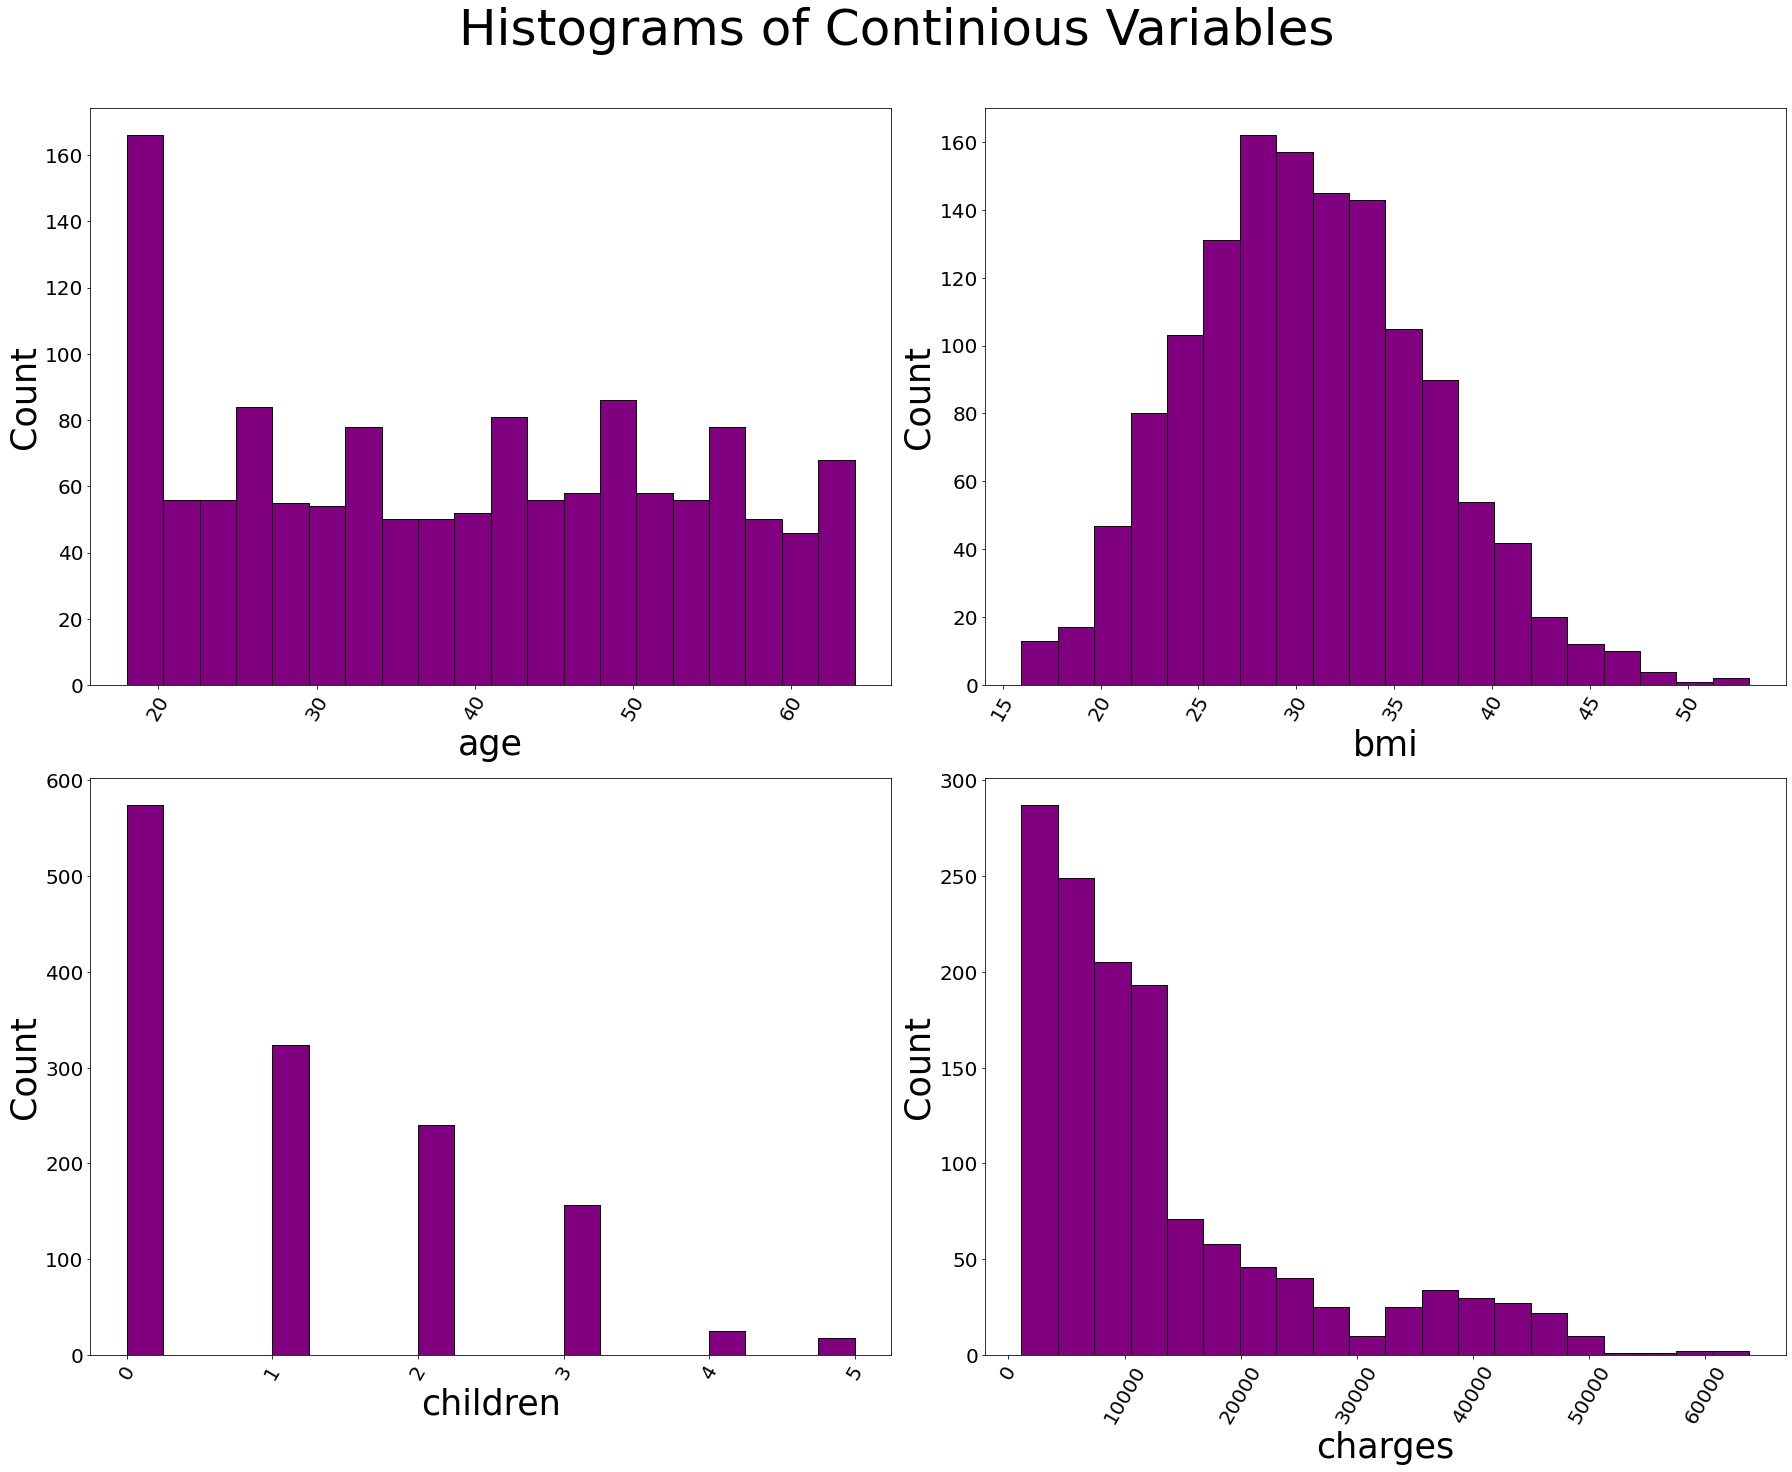

In [12]:
#Histograms to show the frequency of quantative variables

# set up the figure size (20 for the y axis & 10 for the x axis)
plt.rcParams['figure.figsize'] = (25, 20)

# Specify the features of interest (pick the columns to be analyzed)
num_features = ['age', 'bmi', 'children', 'charges']
xaxes = num_features #put the chosen features into x axis 
yaxes = ['Count', 'Count', 'Count', 'Count'] #count the values of chosen features

# draw histograms - make subplots 2 in columns & 8 in rows
fig, axes = plt.subplots(nrows = 2, ncols = 2, constrained_layout=False)
plt.suptitle("Histograms of Continious Variables", fontsize=50, y=1.02)

axes = axes.ravel() #return only axes
for idx, ax in enumerate(axes): #write enumerate() in a loop to count the iterable object
    ax.hist(data[num_features[idx]].dropna(), bins=20, color = 'purple', edgecolor = 'black') #plot histogram using the chosen features 
    ax.set_xlabel(xaxes[idx], fontsize=35)#set the x label with the fontsize
    ax.set_ylabel(yaxes[idx], fontsize=35) #set the y label with the fontsize
    ax.tick_params(axis='both', labelsize=20) #set the tick parameters for both axis and set the label size
    ax.tick_params(axis = 'x', rotation = 60)
    ax.grid(False)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()  #show the plot


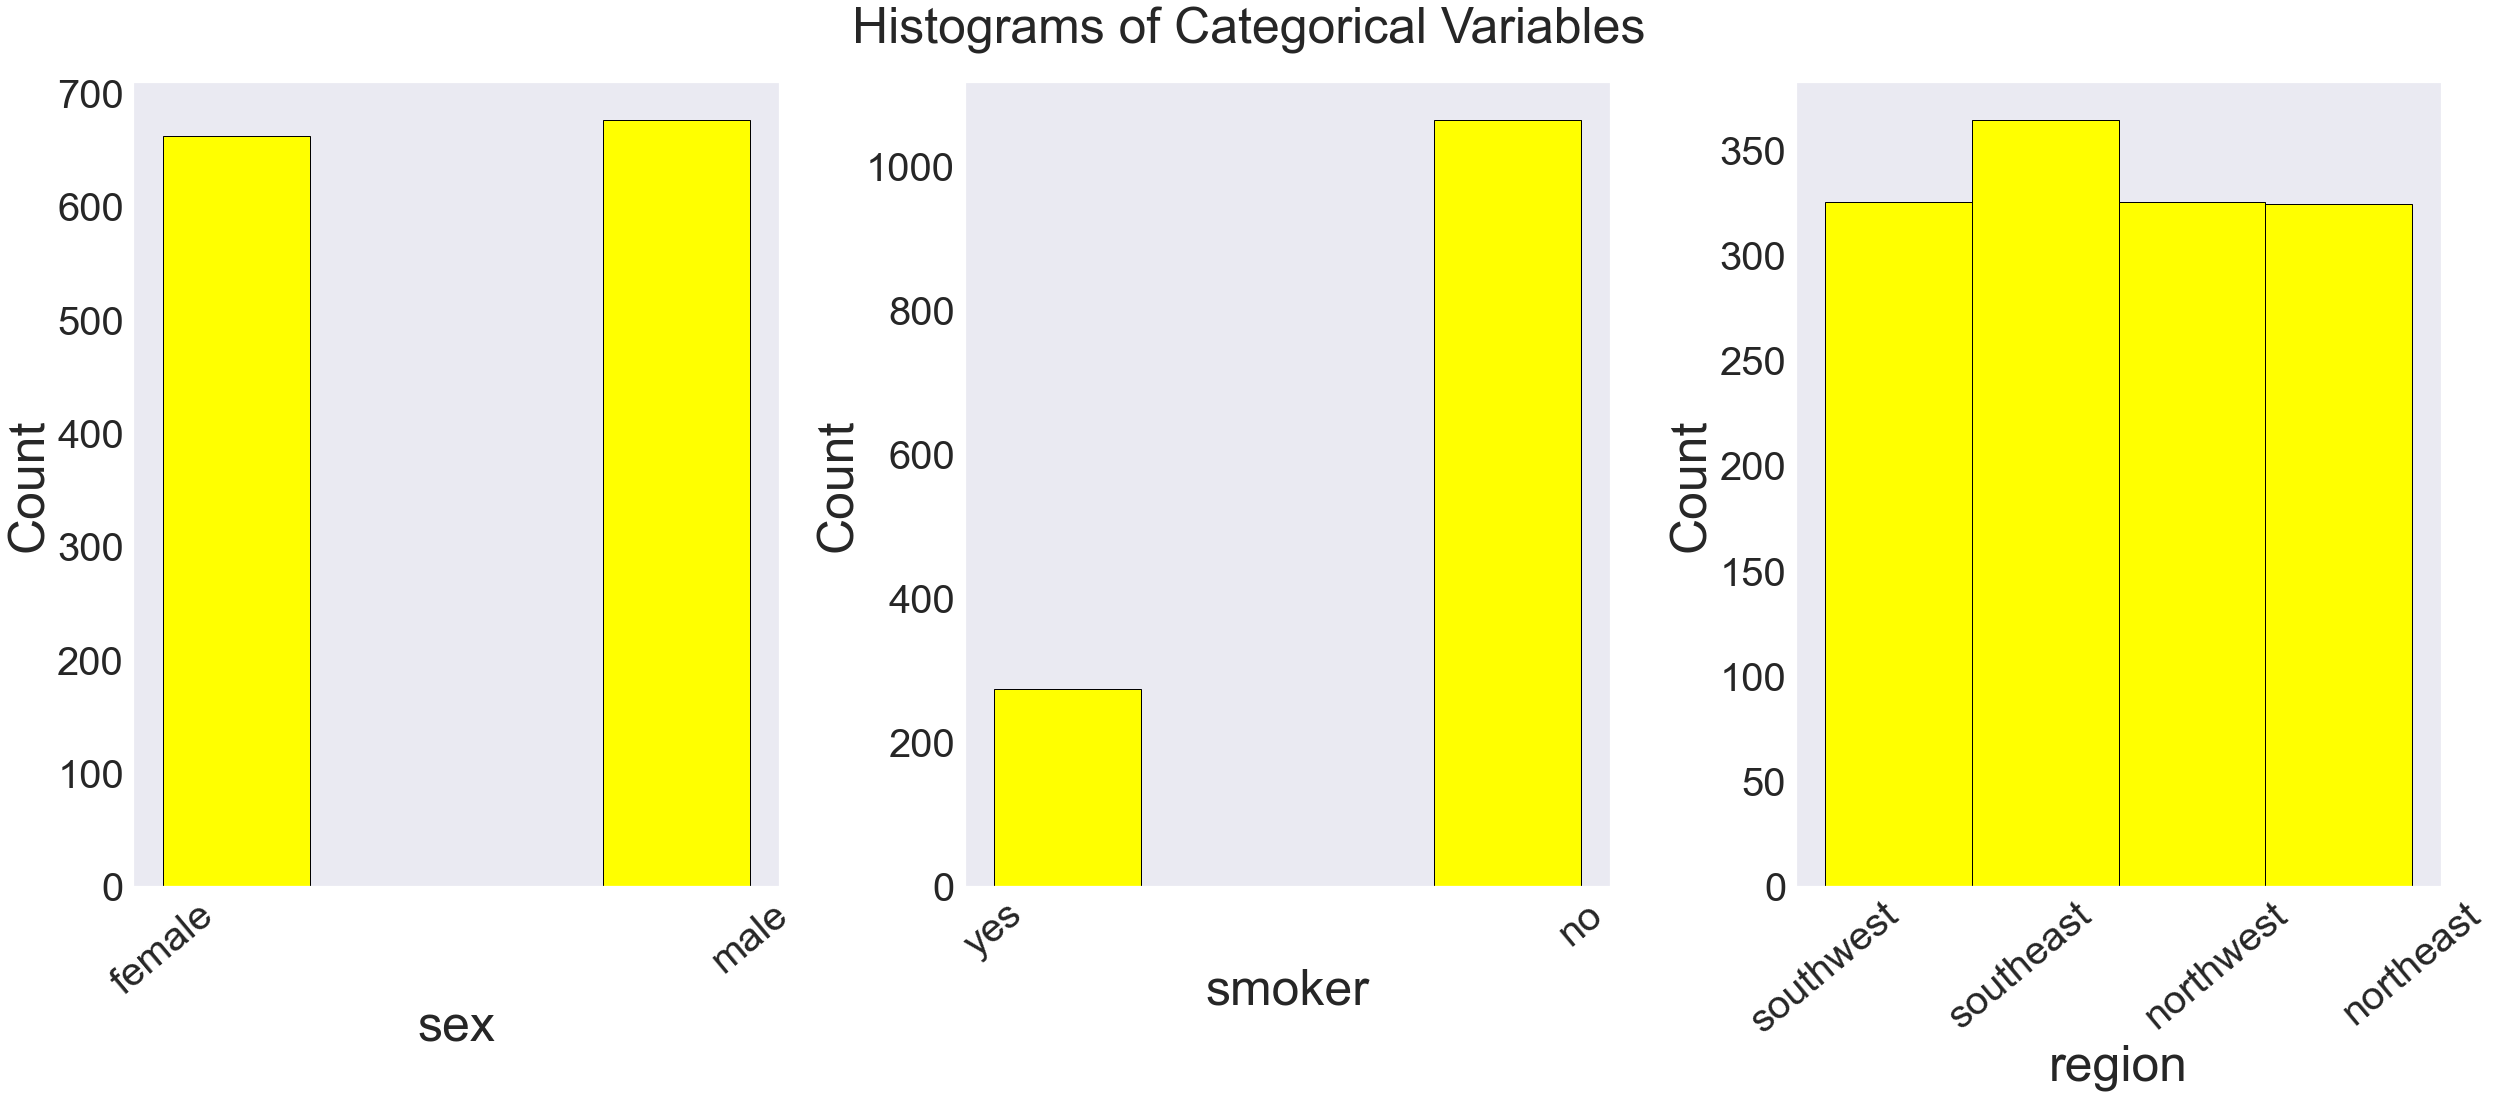

In [350]:
#Histograms to show the frequency of quantative variables

# set up the figure size (20 for the y axis & 10 for the x axis)
plt.rcParams['figure.figsize'] = (35, 15)

# Specify the features of interest (pick the columns to be analyzed)
cat_features = ['sex', 'smoker', 'region']
xaxes = cat_features #put the chosen features into x axis 
yaxes = ['Count', 'Count', 'Count'] #count the values of chosen features

# draw histograms - make subplots 2 in columns & 8 in rows
fig, axes = plt.subplots(nrows = 1, ncols = 3, constrained_layout=False)
plt.suptitle("Histograms of Categorical Variables", fontsize=50, y=1.02)

axes = axes.ravel() #return only axes
for idx, ax in enumerate(axes): #write enumerate() in a loop to count the iterable object
    ax.hist(data[cat_features[idx]], bins=4, color = 'yellow', edgecolor = 'black') #plot histogram using the chosen features 
    ax.set_xlabel(xaxes[idx], fontsize=50)#set the x label with the fontsize
    ax.set_ylabel(yaxes[idx], fontsize=50) #set the y label with the fontsize
    ax.tick_params(axis='both', labelsize=40) #set the tick parameters for both axis and set the label size
    ax.tick_params(axis = 'x', rotation = 40)
    ax.grid(False)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()  #show the plot


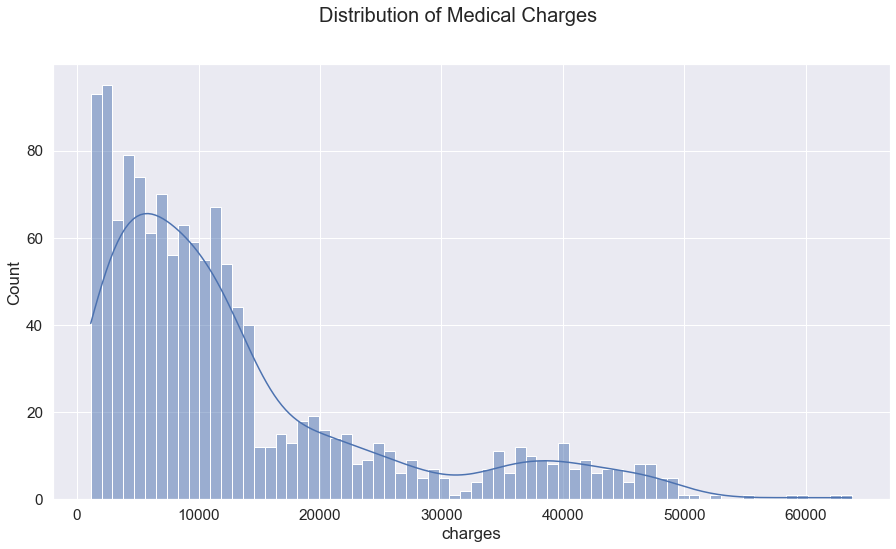

In [351]:
plt.figure(figsize=(15,8))
plt.suptitle("Distribution of Medical Charges", fontsize=20)
sns.histplot(data['charges'], bins=70, kde=True)
fig.tight_layout()
fig.subplots_adjust(top=0.95)

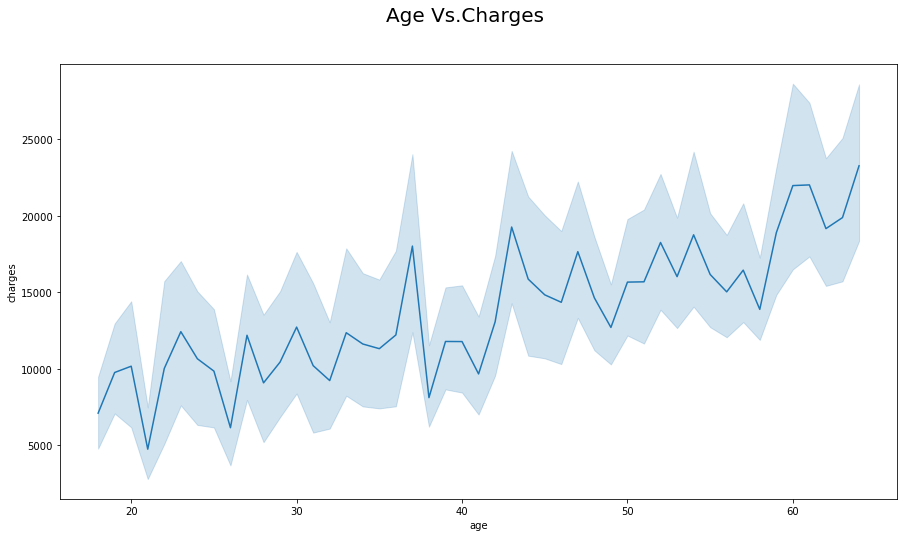

In [15]:
# The relationship between the number of days since the user’s last purchase and whether the offer was accepted in the last activity
plt.figure(figsize=(15,8))
plt.suptitle('Age Vs.Charges', fontsize=20)
sns.lineplot(x='age', y='charges', data=data)
fig.tight_layout()
fig.subplots_adjust(top=0.95)

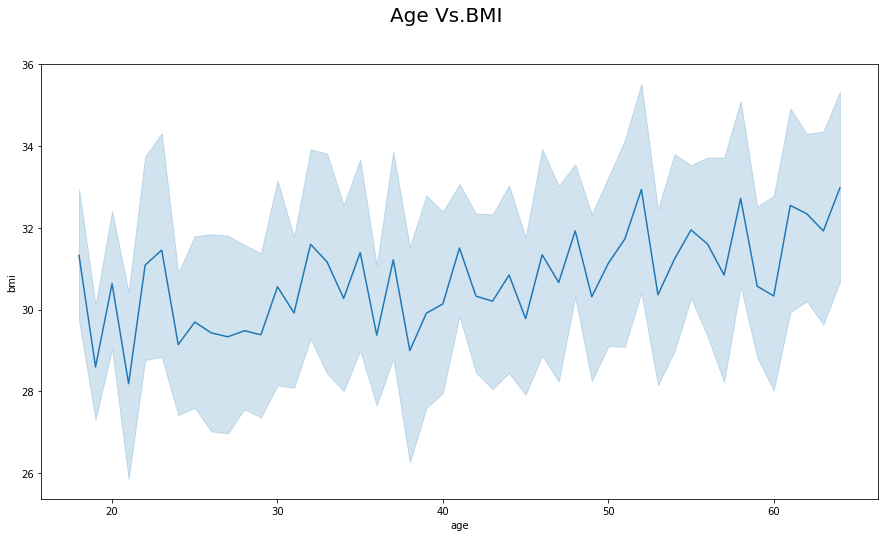

In [16]:
# The relationship between the number of days since the user’s last purchase and whether the offer was accepted in the last activity
plt.figure(figsize=(15,8))
plt.suptitle('Age Vs.BMI', fontsize=20)
sns.lineplot(x='age', y='bmi', data=data)
fig.tight_layout()
fig.subplots_adjust(top=0.95)

C:\Users\Nathaniel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nathaniel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of charges for smokers')

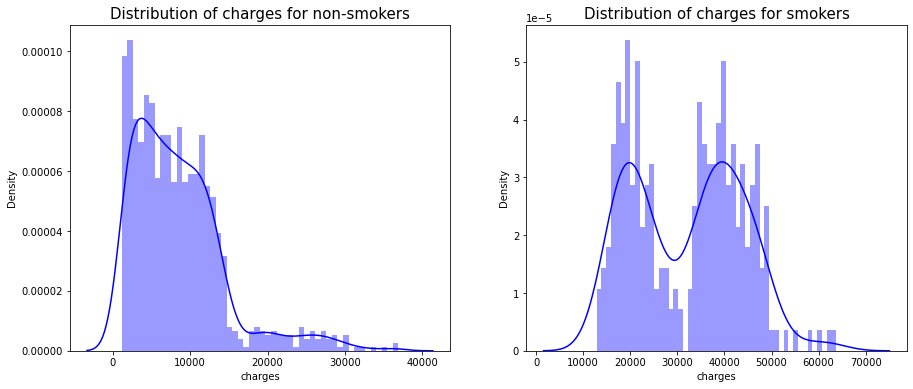

In [17]:
f= plt.figure(figsize=(15,6))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 'no')]['charges'],color='b',ax=ax, bins = 50)
ax.set_title('Distribution of charges for non-smokers',fontsize = 15)

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 'yes')]["charges"],color='b', ax=ax, bins = 50)
ax.set_title('Distribution of charges for smokers',fontsize = 15)



C:\Users\Nathaniel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nathaniel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of charges for female')

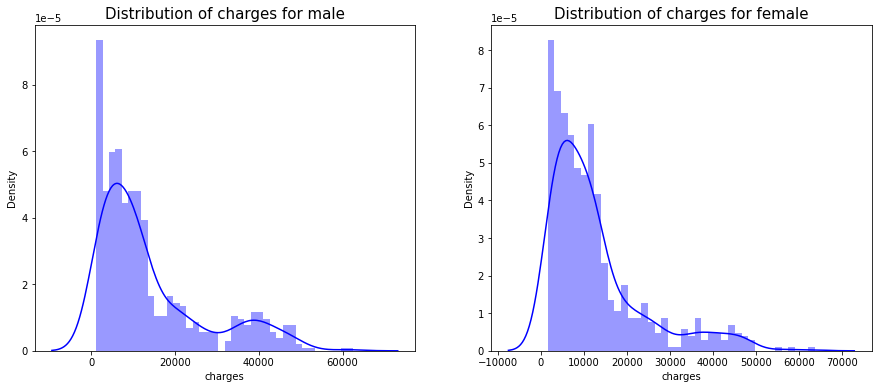

In [18]:
f= plt.figure(figsize=(15,6))

ax=f.add_subplot(121)
sns.distplot(data[(data.sex == 'male')]['charges'],color='b',ax=ax, bins = 40)
ax.set_title('Distribution of charges for male',fontsize = 15)

ax=f.add_subplot(122)
sns.distplot(data[(data.sex == 'female')]["charges"],color='b', ax=ax, bins = 40)
ax.set_title('Distribution of charges for female',fontsize = 15)


C:\Users\Nathaniel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nathaniel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of charges for people with 1 child')

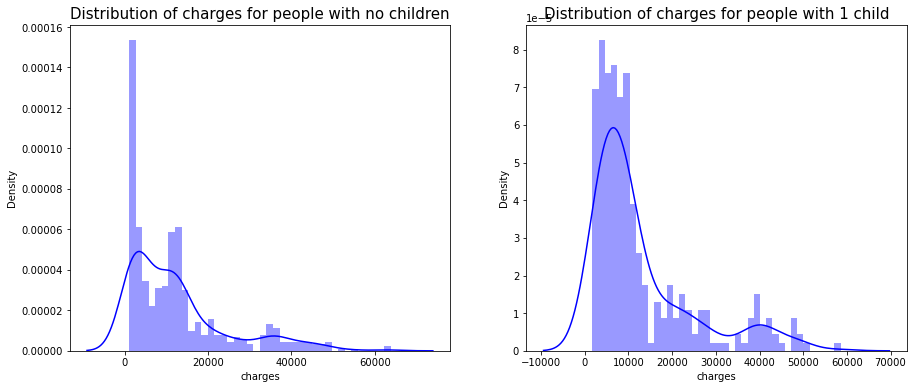

In [19]:
f= plt.figure(figsize=(15,6))

ax=f.add_subplot(121)
sns.distplot(data[(data.children == 0)]['charges'],color='b',ax=ax, bins = 40)
ax.set_title('Distribution of charges for people with no children',fontsize = 15)

ax=f.add_subplot(122)
sns.distplot(data[(data.children == 1)]["charges"],color='b', ax=ax, bins = 40)
ax.set_title('Distribution of charges for people with 1 child',fontsize = 15)


C:\Users\Nathaniel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nathaniel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of charges for people with 3 children')

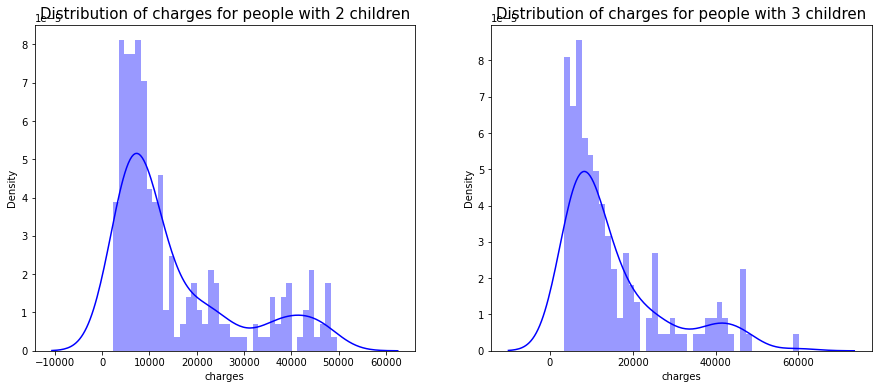

In [20]:
f= plt.figure(figsize=(15,6))

ax=f.add_subplot(121)
sns.distplot(data[(data.children == 2)]['charges'],color='b',ax=ax, bins = 40)
ax.set_title('Distribution of charges for people with 2 children', fontsize = 15)

ax=f.add_subplot(122)
sns.distplot(data[(data.children == 3)]["charges"],color='b', ax=ax, bins = 40)
ax.set_title('Distribution of charges for people with 3 children',  fontsize = 15)

C:\Users\Nathaniel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nathaniel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of charges for people with 5 children')

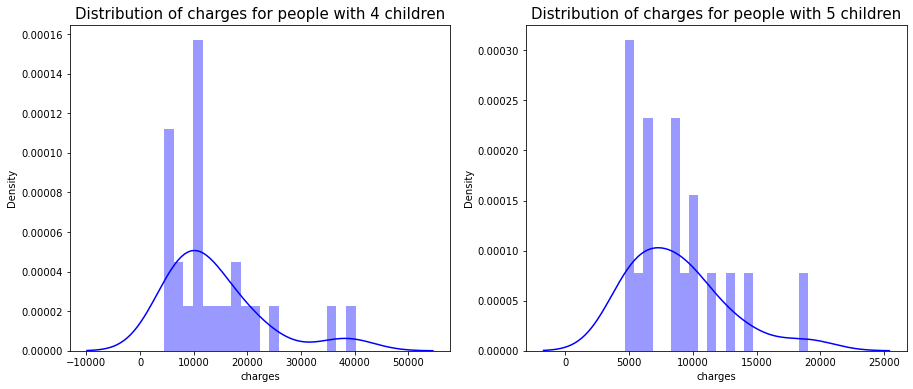

In [21]:
f= plt.figure(figsize=(15,6))

ax=f.add_subplot(121)
sns.distplot(data[(data.children == 4)]['charges'],color='b',ax=ax, bins = 20)
ax.set_title('Distribution of charges for people with 4 children', fontsize = 15)

ax=f.add_subplot(122)
sns.distplot(data[(data.children == 5)]["charges"],color='b', ax=ax, bins = 20)
ax.set_title('Distribution of charges for people with 5 children', fontsize = 15)

Text(0.5, 0.98, 'Does smoker status have impact on the charges?')

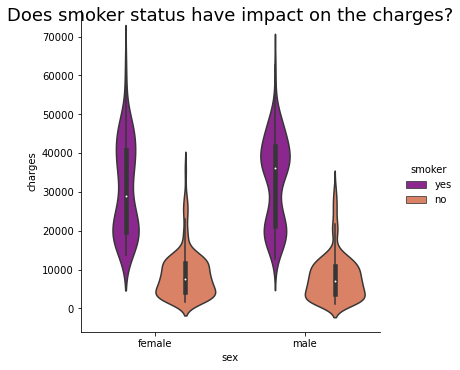

In [22]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=data, palette = 'plasma')

plt.suptitle('Does smoker status have impact on the charges?', fontsize=18)

Text(0.5, 0.98, 'Does region have impact on the charges?')

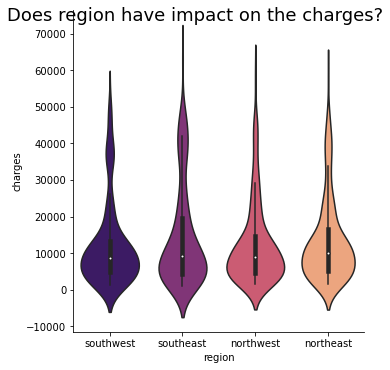

In [23]:
sns.catplot(x="region", y="charges",
            kind="violin", data=data, palette = 'magma')

plt.suptitle('Does region have impact on the charges?', fontsize=18)

Text(0.5, 0.98, 'Does location have impact on the charges?')

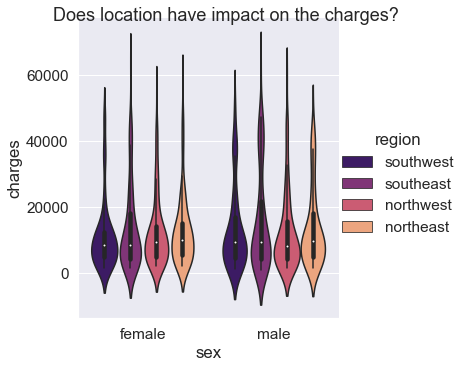

In [352]:
sns.catplot(x="sex", y="charges", hue="region",
            kind="violin", data=data, palette = 'magma')

plt.suptitle('Does location have impact on the charges?', fontsize=18)

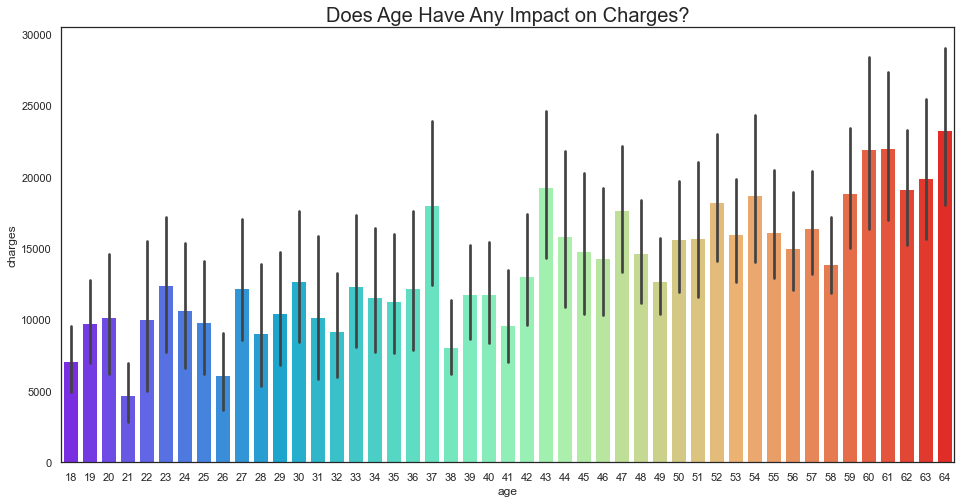

In [25]:
sns.set_theme(style="white")
plt.figure(figsize=(16,8))
plt.title("Does Age Have Any Impact on Charges?",fontsize=20)
ax = sns.barplot(x="age", y="charges", data=data,palette="rainbow")

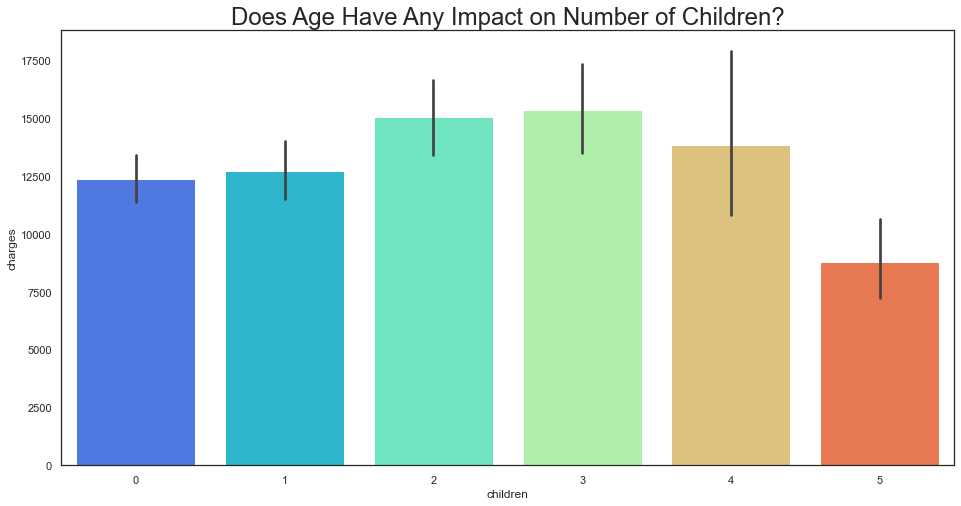

In [357]:
sns.set_theme(style="white")
plt.figure(figsize=(16,8))
plt.title("Does Age Have Any Impact on Number of Children?",fontsize=24)
ax = sns.barplot(x="children", y="charges", data=data,palette="rainbow")

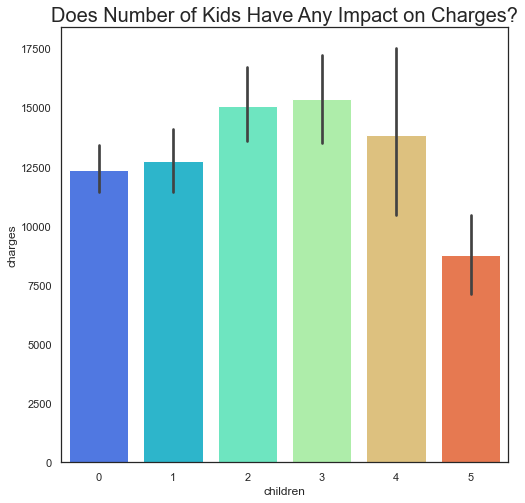

In [356]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("Does Number of Kids Have Any Impact on Charges?",fontsize=20)
ax = sns.barplot(x="children", y="charges", data=data,palette="rainbow")

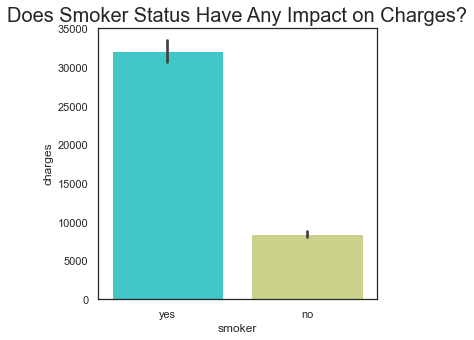

In [353]:
sns.set_theme(style="white")
plt.figure(figsize=(5,5))
plt.title("Does Smoker Status Have Any Impact on Charges?",fontsize=20)
ax = sns.barplot(x="smoker", y="charges", data=data,palette="rainbow")

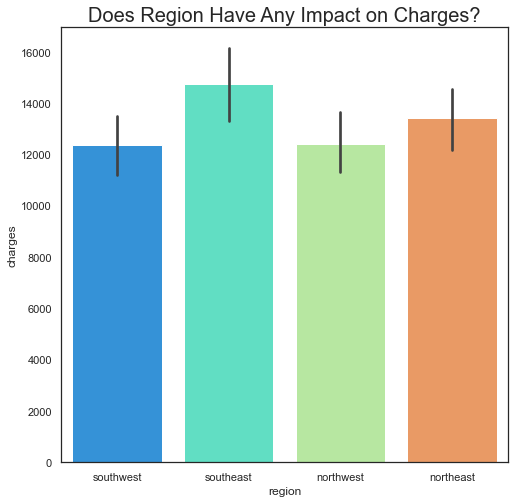

In [29]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("Does Region Have Any Impact on Charges?",fontsize=20)
ax = sns.barplot(x="region", y="charges", data=data,palette="rainbow")

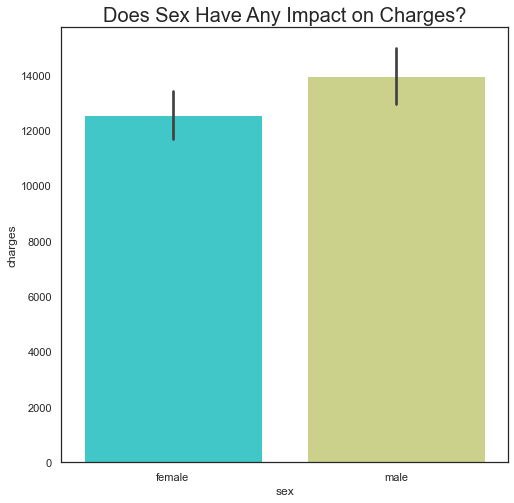

In [355]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("Does Sex Have Any Impact on Charges?",fontsize=20)
ax = sns.barplot(x="sex", y="charges", data=data,palette="rainbow")

Text(0.5, 1.0, 'Scatter plot of charges and BMI')

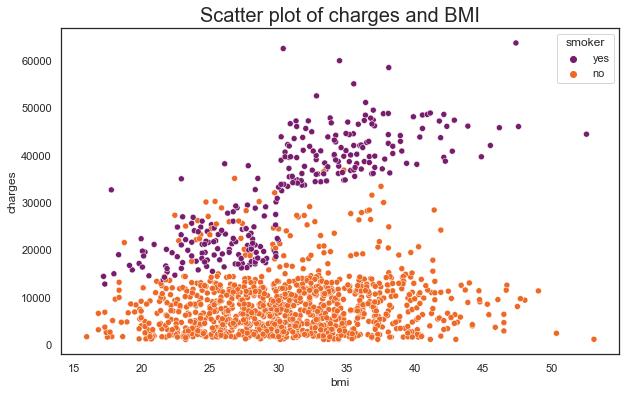

In [359]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=data,palette='inferno',hue='smoker')
ax.set_title('Scatter plot of charges and BMI', fontsize = 20)


C:\Users\Nathaniel\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Scatter plot of charges and BMI')

<Figure size 720x432 with 0 Axes>

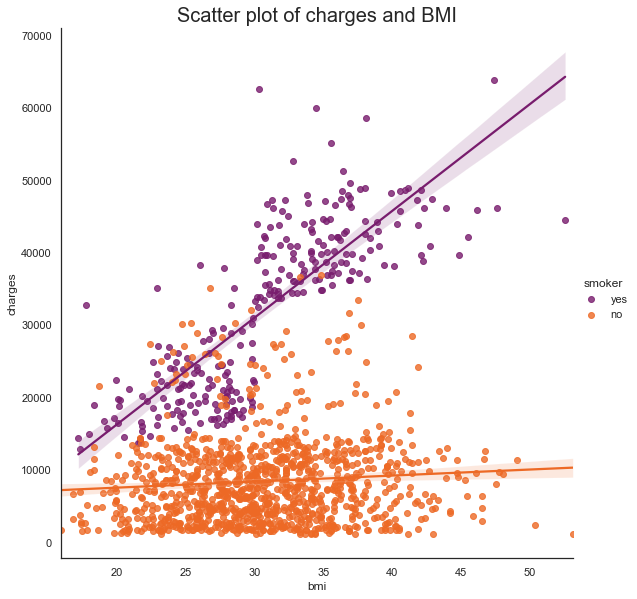

In [365]:
plt.figure(figsize=(10,6))
sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette = 'inferno', size = 8)
plt.title('Scatter plot of charges and BMI', fontsize = 20)


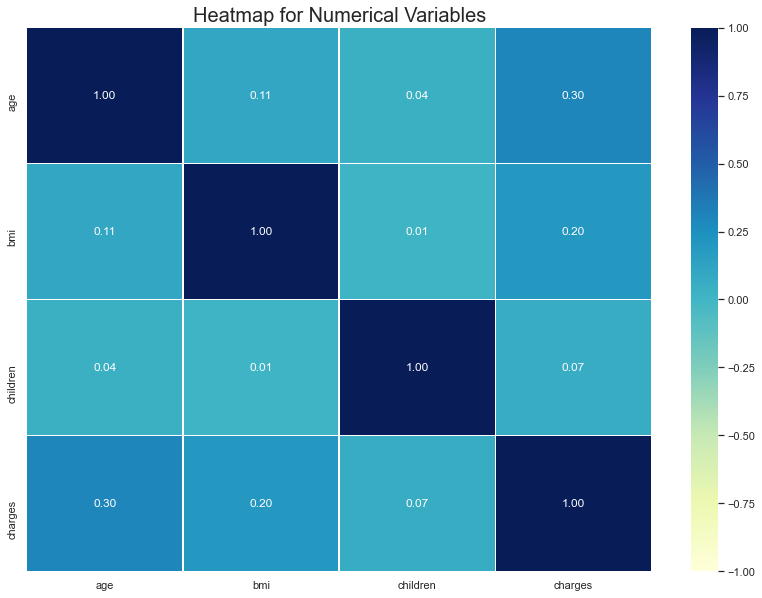

In [32]:
plt.figure(figsize=(14,10))
ax = sns.heatmap(data[num_features].corr(), annot=True, annot_kws={"fontsize":12}, fmt=".2f", vmin=-1,  linewidths=.5, cmap="YlGnBu")
plt.title("Heatmap for Numerical Variables",fontsize=20)
plt.show()

In [ ]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette = 'inferno', size = 8)

In [380]:
#encode categorical variables: sex, smoker and region 
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [179]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


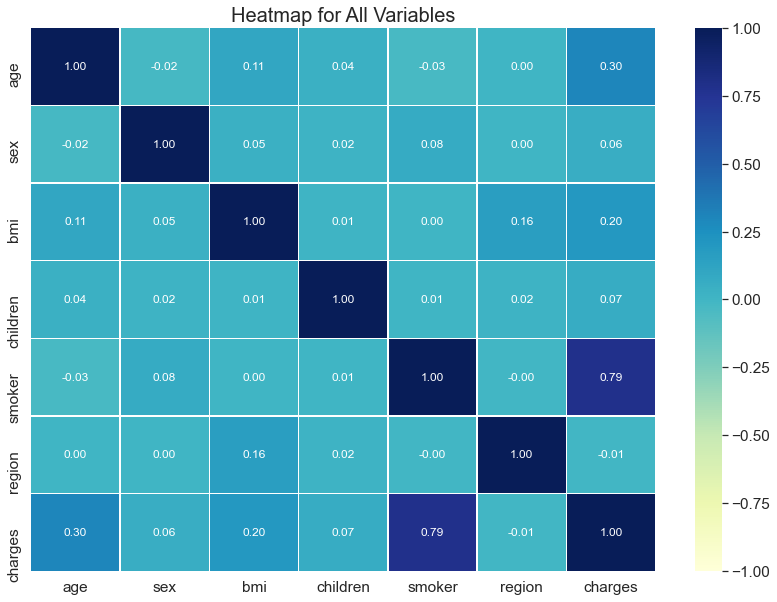

In [180]:
plt.figure(figsize=(14,10))
ax = sns.heatmap(data.corr(), annot=True, annot_kws={"fontsize":12}, fmt=".2f", vmin=-1,  linewidths=.5, cmap="YlGnBu")
plt.title("Heatmap for All Variables",fontsize=20)
plt.show()

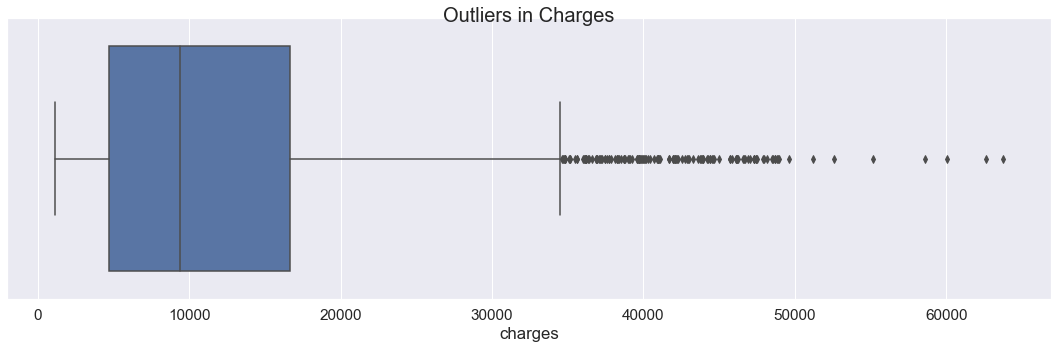

In [181]:
#Detect Outliers

#Charges
fig = plt.figure(figsize=(15,5))
plt.suptitle("Outliers in Charges", fontsize=20)
ax = sns.boxplot(x= 'charges', data = data)
fig.tight_layout()
fig.subplots_adjust(top=0.95)

In [182]:
#use z-score to detect outliers
z = np.abs(stats.zscore(data['charges']))
print(z)

[0.2985838  0.95368917 0.72867467 ... 0.96159623 0.93036151 1.31105347]


In [183]:
#defining a treshhold to identify an outlier
threshhold = 3
print(np.where(z > 3))

(array([  34,  543,  577,  819, 1146, 1230, 1300], dtype=int64),)


In [184]:
print(data[['charges']].iloc[34])
print(data[['charges']].iloc[543])
print(data[['charges']].iloc[577])
print(data[['charges']].iloc[819])
print(data[['charges']].iloc[1146])
print(data[['charges']].iloc[1230])
print(data[['charges']].iloc[1300])

charges    51194.55914
Name: 34, dtype: float64
charges    63770.42801
Name: 543, dtype: float64
charges    58571.07448
Name: 577, dtype: float64
charges    55135.40209
Name: 819, dtype: float64
charges    52590.82939
Name: 1146, dtype: float64
charges    60021.39897
Name: 1230, dtype: float64
charges    62592.87309
Name: 1300, dtype: float64


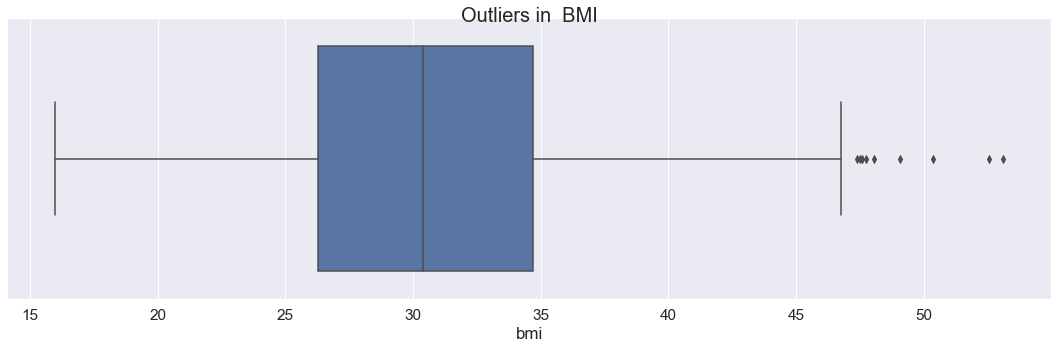

In [185]:
#Detect outliers
#bmi
fig = plt.figure(figsize=(15,5))
plt.suptitle("Outliers in  BMI", fontsize=20)
ax = sns.boxplot(x= 'bmi', data = data)
fig.tight_layout()
fig.subplots_adjust(top=0.95)

In [186]:
#use z-score to detect outliers
z = np.abs(stats.zscore(data['bmi']))
print(z)

[0.45332    0.5096211  0.38330685 ... 1.0148781  0.79781341 0.26138796]


In [187]:
#defining a treshhold to identify an outlier
threshhold = 3
print(np.where(z > 3))

(array([ 116,  847, 1047, 1317], dtype=int64),)


In [188]:
print(data[['bmi']].iloc[116])
print(data[['bmi']].iloc[847])
print(data[['bmi']].iloc[1047])
print(data[['bmi']].iloc[1317])

bmi    49.06
Name: 116, dtype: float64
bmi    50.38
Name: 847, dtype: float64
bmi    52.58
Name: 1047, dtype: float64
bmi    53.13
Name: 1317, dtype: float64


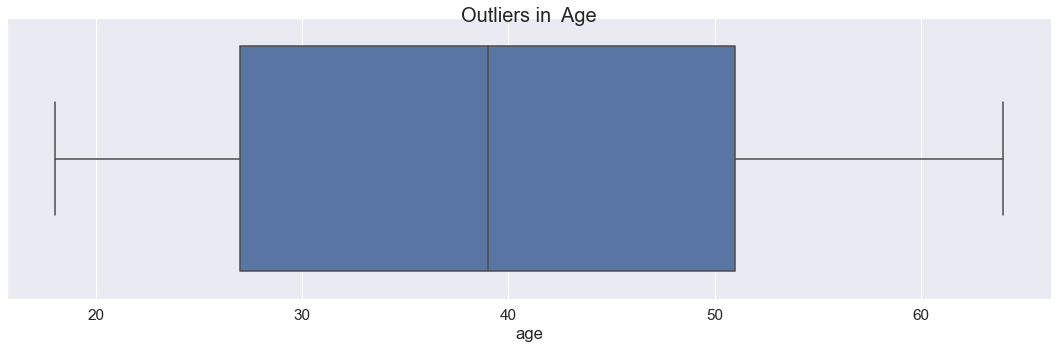

In [189]:
#Detect outliers
#age
fig = plt.figure(figsize=(15,5))
plt.suptitle("Outliers in  Age", fontsize=20)
ax = sns.boxplot(x= 'age', data = data)
fig.tight_layout()
fig.subplots_adjust(top=0.95)

In [190]:
#use z-score to detect outliers
z = np.abs(stats.zscore(data['age']))
print(z)

[1.43876426 1.50996545 0.79795355 ... 1.50996545 1.29636188 1.55168573]


In [191]:
#defining a treshhold to identify an outlier
threshhold = 3
print(np.where(z > 3))

(array([], dtype=int64),)


In [192]:
#No outliers in Age

In [193]:
from scipy.stats import norm, skew
(mu, sigma) = norm.fit(data['charges'])

C:\Users\Nathaniel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1080x576 with 0 Axes>

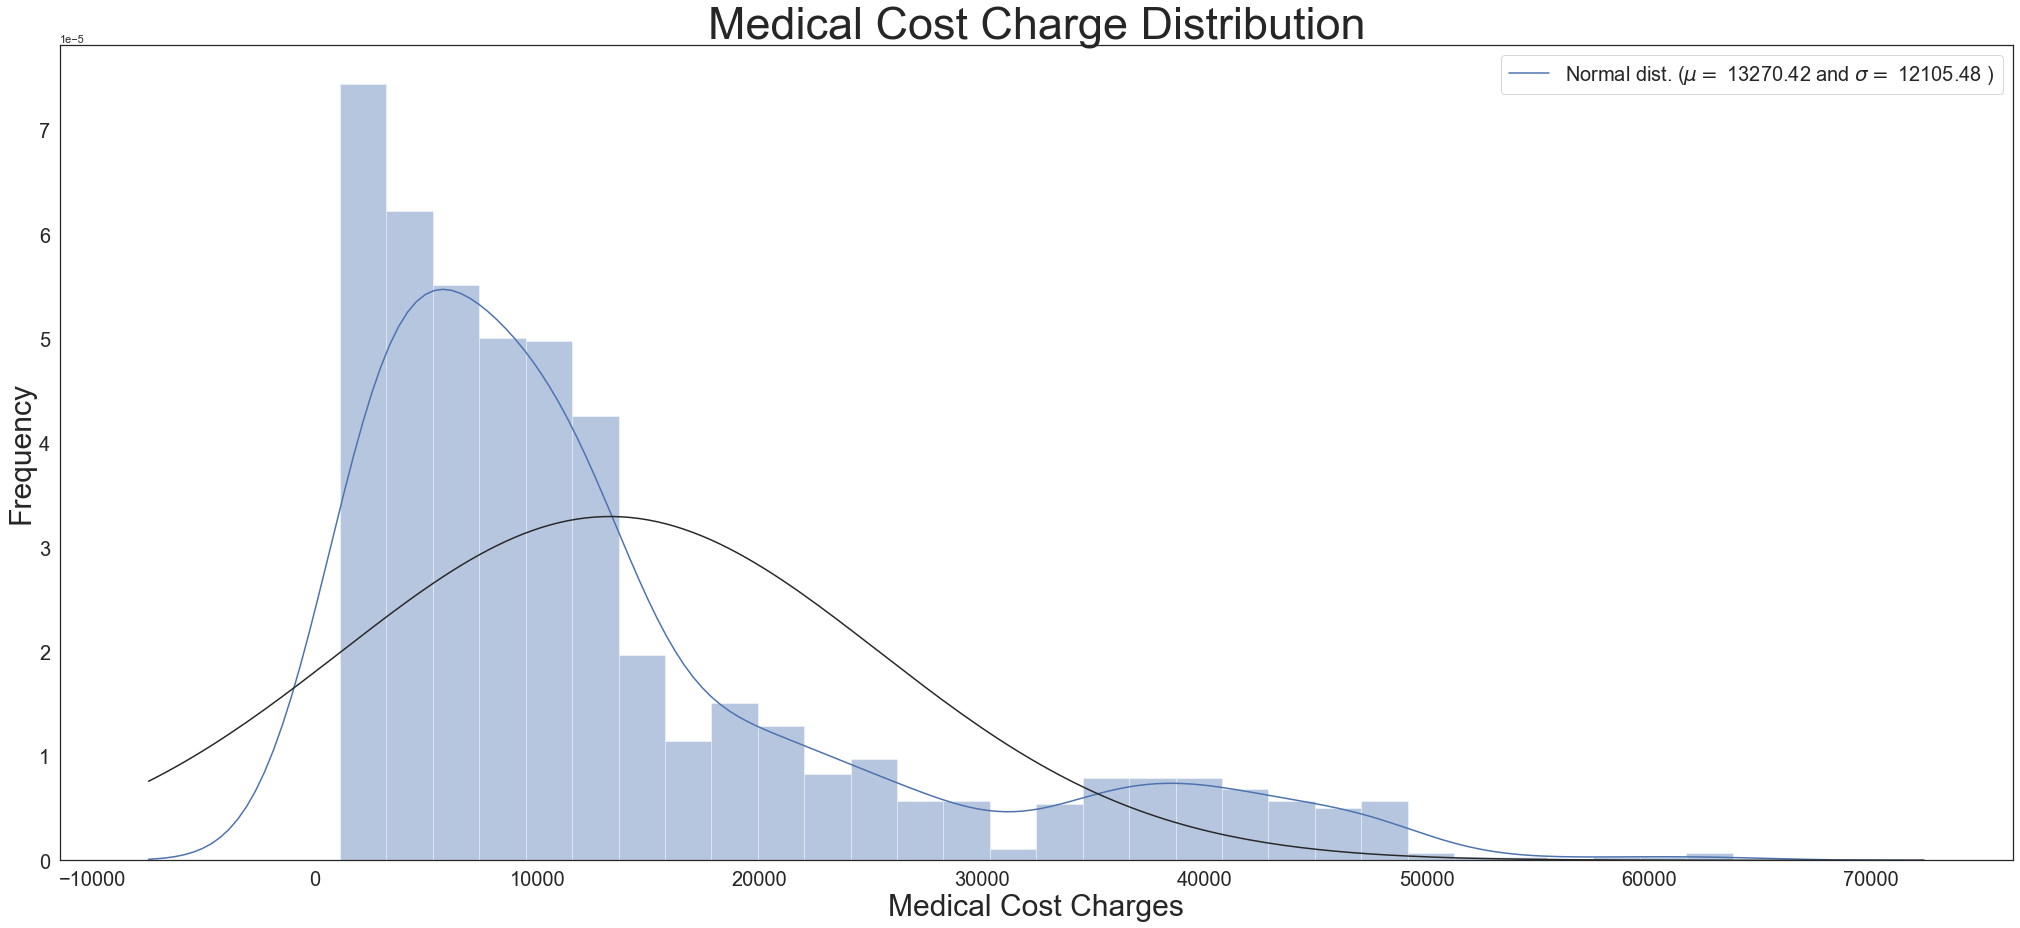

<Figure size 1080x576 with 0 Axes>

In [70]:
sns.distplot(data['charges'] , fit=norm)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], fontsize = 20)
plt.ylabel('Frequency', fontsize = 30)
plt.xlabel('Medical Cost Charges', fontsize = 30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Medical Cost Charge Distribution', fontsize = 45)
plt.figure(figsize=(15,8))

Text(0.5, 1.0, 'Probability Plot')

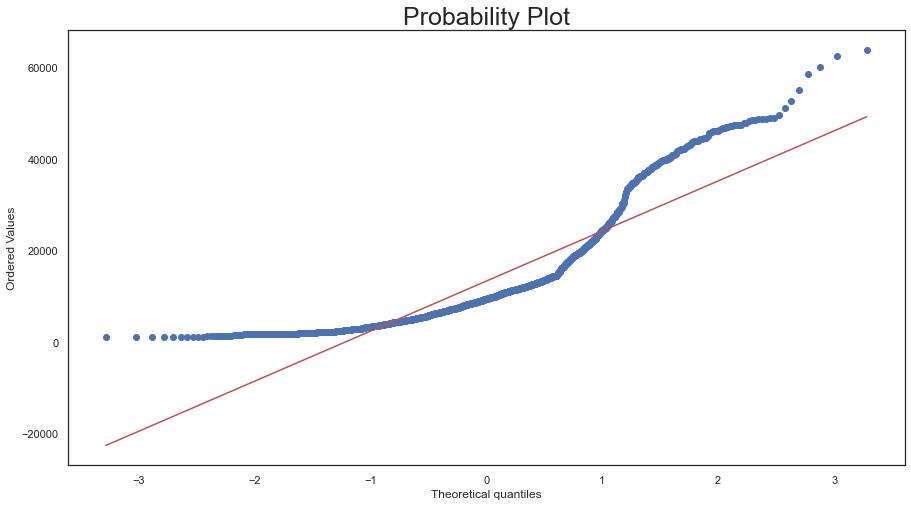

In [72]:
fig = plt.figure(figsize=(15,8))
res = stats.probplot(data['charges'], plot = plt)
plt.title('Probability Plot', fontsize = 25)

               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.157566  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.016569  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181  0.787251
region    0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000 -0.006208
charges   0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208  1.000000


Text(0.5, 1.0, 'Correlation Matrix')

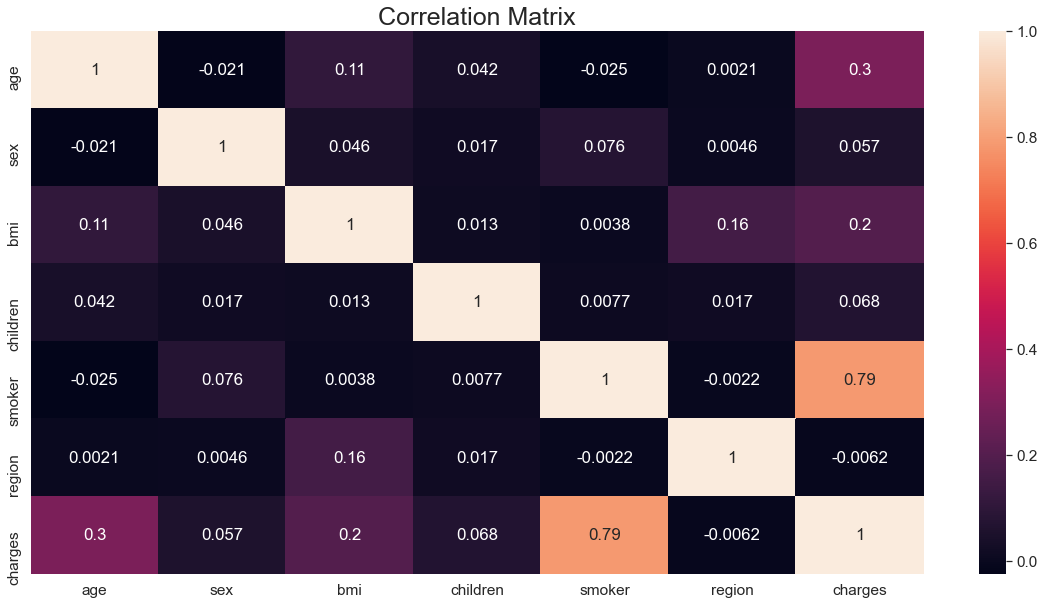

In [194]:
plt.rcParams["figure.figsize"] = (20,10)
df1 = pd.DataFrame(data)
corrMatrix = data.corr()
print (corrMatrix)
sns.set(font_scale=1.4)
sns.heatmap(corrMatrix, annot=True)
plt.title('Correlation Matrix',fontsize=25)

In [75]:
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


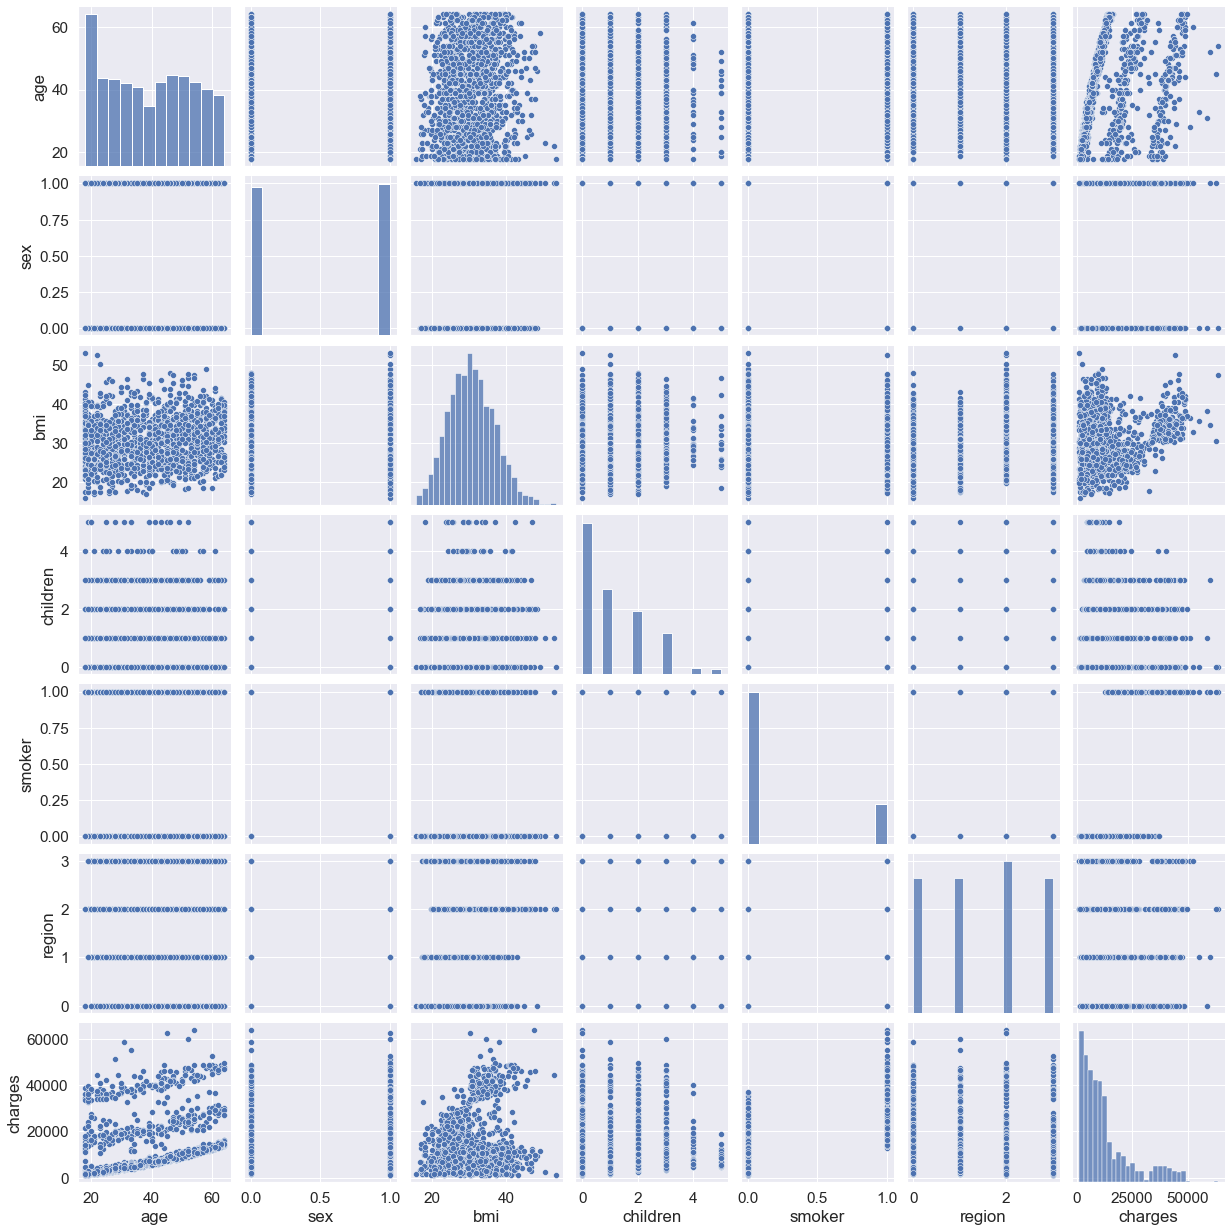

In [76]:
sns.pairplot(data)
plt.show()

In [395]:
#Seperate the data into training and test
from sklearn.model_selection import train_test_split

In [396]:
y = data.iloc[:, [6]]
x = data.iloc[:, [0,1,2,3,4,5]]

In [397]:
# split the data using 70:30 ratio
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size =0.33, random_state=1)

In [398]:
# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

No. of samples in training set:  896
No. of samples in validation set: 442


In [399]:
#Machine Learning
#Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(x,y)

In [400]:
model.score(x,y)

0.7507372027994937

In [401]:
#display adjusted R-squared
1 - (1-model.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1)

0.7496135538263886

In [402]:
#Normalize & fit the training model
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)
print(lin_reg.intercept_)

[-10986.3234359]


In [403]:
#Normalize & fit the training model on Linear Regression
model = LinearRegression(normalize = True).fit(X_train, y_train)
print("The best intercept value in the regression line is:", model.intercept_)

The best intercept value in the regression line is: [-10986.3234359]


In [404]:
print("The best slope values in the regression line are:", model.coef_)

The best slope values in the regression line are: [[  257.74484014  -229.7246056    309.8886662    364.89050428
  24115.73231158  -317.30291462]]


In [405]:
#check the goodness to fit on a test data;
print("Coefficient of determination or R2 on test data is:", model.score(X_val, y_val))

Coefficient of determination or R2 on test data is: 0.7391229375049766


In [406]:
#check the goodness to fit on a training data
print("Coefficient of determination or R2 on training data is:", model.score(X_train, y_train))

Coefficient of determination or R2 on training data is: 0.7552148446089074


In [407]:
#Predict the medical cost charges
prediction = lin_reg.predict(X_val)
prediction

array([[ 4.37414532e+03],
       [ 1.29319935e+04],
       [ 1.24429107e+04],
       [ 1.34544613e+04],
       [ 5.20092618e+02],
       [ 3.23242141e+04],
       [ 1.31325482e+04],
       [ 1.23086540e+04],
       [ 3.80946462e+03],
       [ 3.02124229e+04],
       [ 1.14453301e+04],
       [ 1.71815709e+04],
       [ 8.95297537e+03],
       [ 8.23871293e+03],
       [ 3.45822003e+03],
       [ 1.02922143e+04],
       [ 4.00825093e+03],
       [ 6.76142479e+03],
       [ 1.52680409e+04],
       [ 1.43302516e+04],
       [ 1.24904818e+04],
       [ 3.34229722e+04],
       [ 9.14894790e+03],
       [ 8.96232374e+03],
       [ 2.98538087e+03],
       [ 8.20146556e+03],
       [ 9.44020550e+03],
       [ 1.10794123e+04],
       [ 7.49246567e+03],
       [ 4.40606260e+03],
       [ 1.39543836e+04],
       [ 5.69214278e+03],
       [ 3.48911397e+04],
       [ 2.73711795e+04],
       [ 3.39718489e+04],
       [ 9.66361793e+03],
       [ 3.06191906e+04],
       [ 2.67841179e+04],
       [ 1.5

In [408]:
Y_test_pred = lin_reg.predict(X_val)
Y_train_pred = lin_reg.predict(X_train)

C:\Users\Nathaniel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distance between actual values vs. predicted values using Linear Regression')

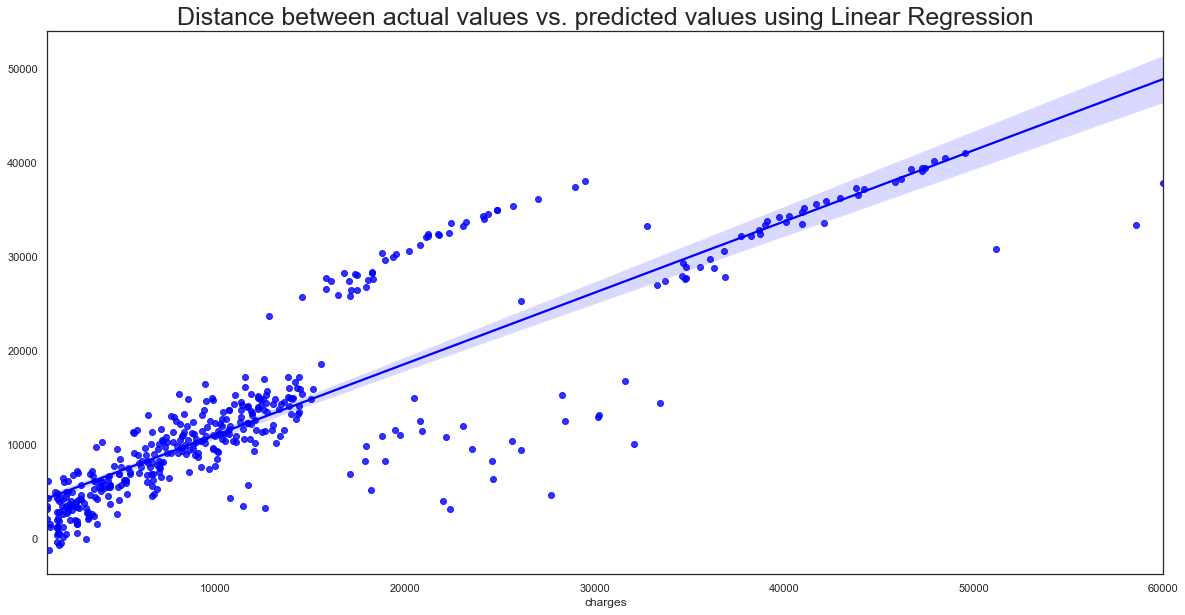

In [409]:
plt.rcParams["figure.figsize"] = (20,10)
sns.regplot(y_val, prediction, color='Blue')
plt.title('Distance between actual values vs. predicted values using Linear Regression', fontsize = 25)


In [410]:
from sklearn.metrics import mean_squared_error

#Model MSE with LinearRegression model
MSE = mean_squared_error(y_val, prediction)
MSE

35623609.7383993

In [411]:
#Model RMSE with LinearRegression model
RMSE= np.sqrt(MSE)
RMSE

5968.551728719396

In [412]:
#Model Accuracy with Regression model
model_accuracy =lin_reg.score(X_train, y_train)
print(model_accuracy)

0.7552148446089074


In [413]:
#Model MAE with LinearRegression model

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_val, prediction)
mae

4080.3262890243504

In [414]:
#GradientBoostingRegressor model
#fit the training model on GradientBoostingRegressor
#Model Accuracy with GradientBoostingRegressor model 

from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)
print("Coefficient of determination or R2 on training data is:", model.score(X_train, y_train))

Coefficient of determination or R2 on training data is: 0.9074057733593384


C:\Users\Nathaniel\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [415]:
#Model Accuracy with GradientBoostingRegressor model 

print("Coefficient of determination or R2 on test data is:",model.score(X_val, y_val))

Coefficient of determination or R2 on test data is: 0.8593419918004906


In [416]:
prediction_gradboost = model.predict(X_val)
prediction_gradboost

array([ 3402.7229369 , 12302.1976819 , 10033.40464724, 10686.10945934,
        2650.64564132, 37031.74836895, 10455.90015561, 12108.87204775,
        5275.15866367, 21178.73597091, 15496.20989889, 14873.99260745,
        7059.97240598,  7378.17715751,  2146.90462237, 10492.95297229,
        5917.05636141,  7599.52044043, 15093.5938668 , 14473.22658955,
       12225.73527638, 38770.55774582,  9834.97619189, 10190.92041818,
        4463.79472701,  7658.22857083,  9026.6336895 ,  9502.02122878,
        6841.43497937,  5710.3450529 , 12780.02937057,  6543.22650034,
       24015.24158942, 34476.04088747, 24170.64707907, 12259.388447  ,
       37650.8489431 , 15900.00884088, 12158.90720886, 42221.35095314,
        6465.52493751, 12147.52629655, 12567.59357566, 14873.35780591,
        6205.61329519, 14441.87480915,  2806.02686646, 34765.02862766,
        9910.68515715, 16421.48142863, 14668.17283075, 14517.12993581,
        4139.42186872,  9356.29384953, 18072.40590049,  3992.7311202 ,
      

C:\Users\Nathaniel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distance between actual values vs. predicted values using GradientBoosting Regressor')

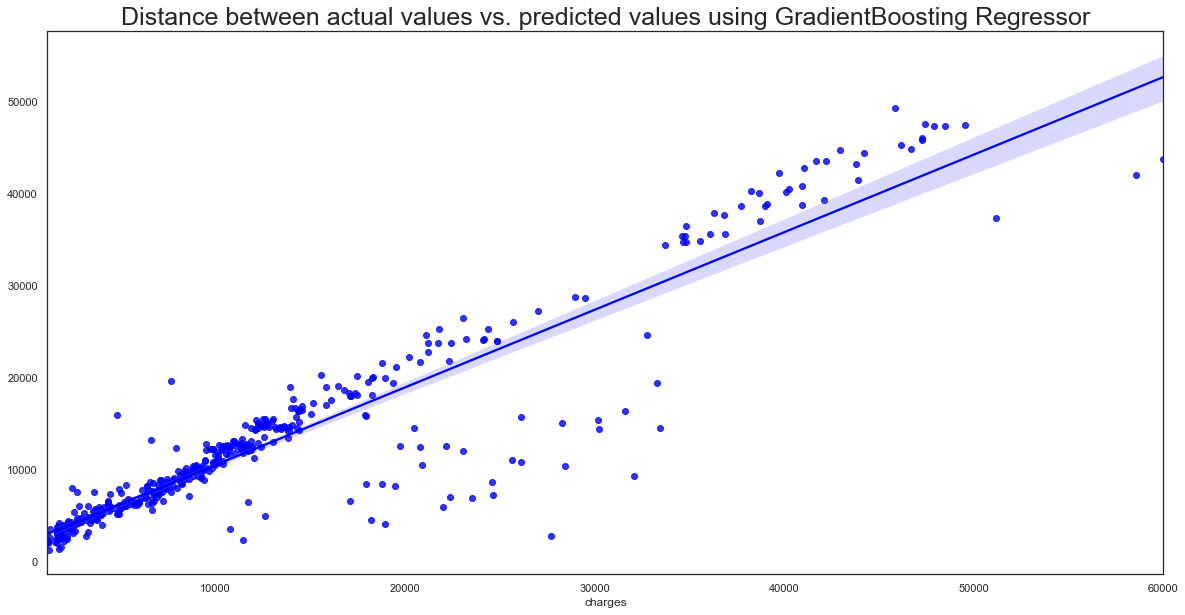

In [417]:
plt.rcParams["figure.figsize"] = (20,10)
sns.regplot(y_val, prediction_gradboost, color='Blue')
plt.title('Distance between actual values vs. predicted values using GradientBoosting Regressor', fontsize = 25)


In [418]:
#Model MSE with GradientBoostingRegressor model 

MSE = mean_squared_error(y_val, prediction_gradboost)
MSE

19207307.621288005

In [419]:

#Model RMSE with GradientBoostingRegressor model 

RMSE= np.sqrt(MSE)
RMSE

4382.6142450925345

In [420]:

#Model MAE with GradientBoostingRegressor model 

mae = mean_absolute_error(y_val, prediction_gradboost)
mae

2412.1577957010127

In [421]:
#GradientBoostingRegressor model
#fit the training model on GradientBoostingRegressor
#Model Accuracy with Ridge regression model 

from sklearn.linear_model import Ridge
model = Ridge(random_state=0).fit(X_train, y_train)
model.score(X_train, y_train)

0.755186053108261

In [422]:
model.score(X_val, y_val)

0.7394355626301181

In [423]:
prediction_ridge = model.predict(X_val)
prediction_ridge

array([[ 4.41611371e+03],
       [ 1.29714923e+04],
       [ 1.24835048e+04],
       [ 1.34823859e+04],
       [ 5.58326850e+02],
       [ 3.22005308e+04],
       [ 1.31722022e+04],
       [ 1.23368241e+04],
       [ 3.84927589e+03],
       [ 3.00776949e+04],
       [ 1.14722023e+04],
       [ 1.72118438e+04],
       [ 8.99199990e+03],
       [ 8.26650361e+03],
       [ 3.49986147e+03],
       [ 1.03302640e+04],
       [ 4.04697384e+03],
       [ 6.78797603e+03],
       [ 1.52967848e+04],
       [ 1.43586763e+04],
       [ 1.25306934e+04],
       [ 3.32892362e+04],
       [ 9.17723191e+03],
       [ 9.00082199e+03],
       [ 3.01551246e+03],
       [ 8.24037588e+03],
       [ 9.47768239e+03],
       [ 1.11086153e+04],
       [ 7.52081119e+03],
       [ 4.44562645e+03],
       [ 1.39829655e+04],
       [ 5.73014178e+03],
       [ 3.47533123e+04],
       [ 2.72494225e+04],
       [ 3.38346167e+04],
       [ 9.70180520e+03],
       [ 3.04973634e+04],
       [ 2.66581550e+04],
       [ 1.5

C:\Users\Nathaniel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distance between actual values vs. predicted values using Ridge Regression')

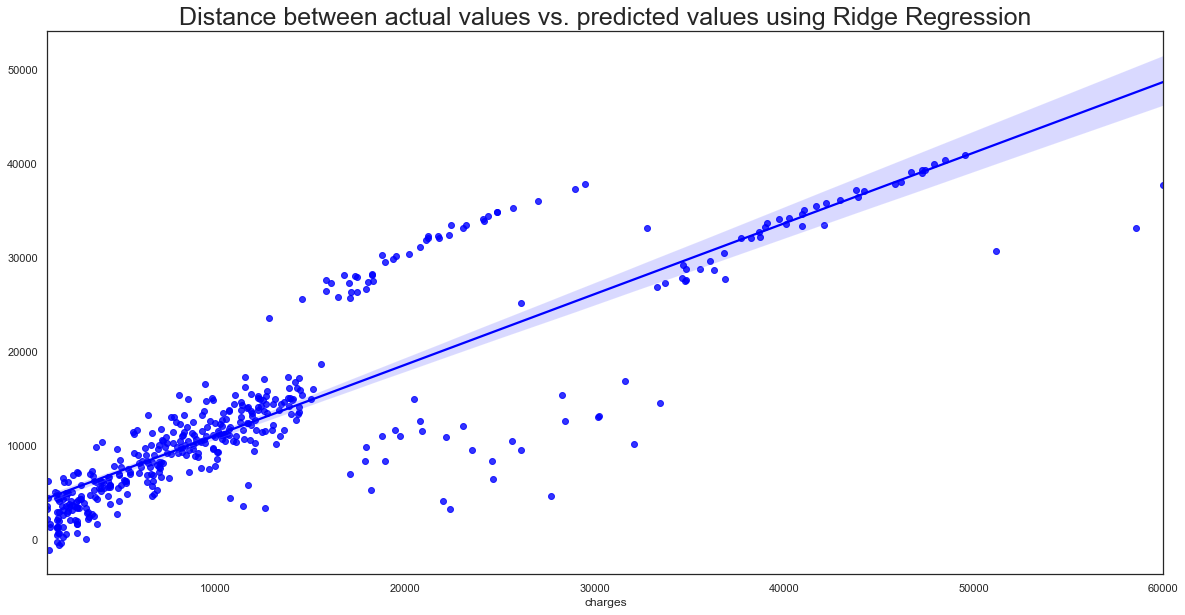

In [424]:
plt.rcParams["figure.figsize"] = (20,10)
sns.regplot(y_val, prediction_ridge, color='Blue')
plt.title('Distance between actual values vs. predicted values using Ridge Regression', fontsize = 25)


In [425]:
#Model MSE with Ridge Regression model 

MSE = mean_squared_error(y_val, prediction_gradboost)
MSE

19207307.621288005

In [430]:
#Model RMSE with Ridge Regression model 

RMSE= np.sqrt(MSE)
RMSE

4382.6142450925345

In [431]:
#Model MAE with Ridge Regression model 

mae = mean_absolute_error(y_val, prediction_gradboost)
mae

2412.1577957010127

In [432]:
#RandomForestRegressor Model
#fit the training model on RandomForest

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0).fit(X_train, y_train)
model.score(X_train, y_train)


<ipython-input-432-63aa75b538d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor(random_state=0).fit(X_train, y_train)


0.9773019251729405

In [433]:
model.score(X_val, y_val)

0.830744253690391

In [434]:
prediction_randomforestreg = model.predict(X_val)
prediction_randomforestreg


array([ 2090.2039821 , 12386.0062724 ,  9117.5814281 , 10807.0875541 ,
        2226.7760844 , 39496.5799364 , 10365.5397263 , 11607.230568  ,
        3653.5892216 , 19835.352608  , 15593.9976869 , 11919.6859219 ,
        7109.5751701 ,  6831.1742675 ,  1177.904895  , 10571.7721518 ,
        5470.8422079 ,  6652.6334297 , 16956.0825539 , 13447.090062  ,
       10184.869099  , 40491.9420098 , 10267.302874  ,  9364.6779575 ,
       14999.08477883,  6679.3621495 ,  9338.3341153 ,  8353.8041475 ,
        7396.1268134 ,  4086.548486  , 12569.9603249 ,  6717.3031885 ,
       25129.7614291 , 34073.748177  , 24921.2049444 , 14359.6190453 ,
       39634.4918203 , 17112.273166  , 14360.7353253 , 46003.850589  ,
        7516.7184971 , 11816.9770345 , 12522.7446936 , 19814.8454871 ,
        6783.6297923 , 12820.4748275 ,  1801.911158  , 34761.9991945 ,
        9899.1707343 , 18086.5124427 , 14565.5517082 , 17015.6888185 ,
        7552.2879802 , 10289.8207782 , 17717.1460328 ,  5420.85934   ,
      

C:\Users\Nathaniel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distance between actual values vs. predicted values using Random Forest Regression')

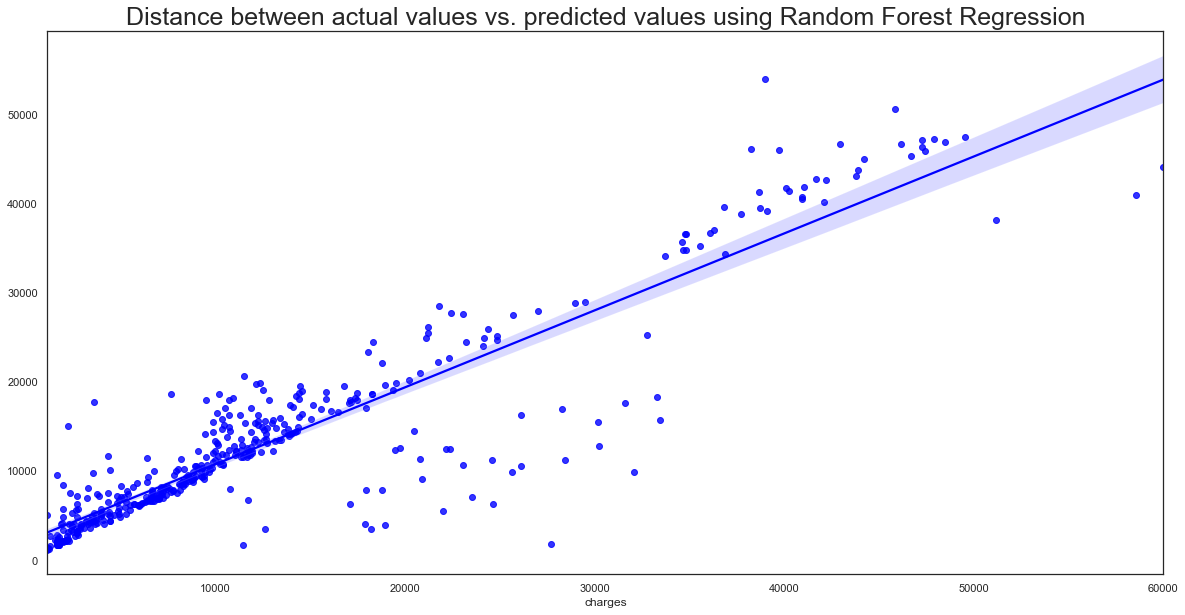

In [435]:
plt.rcParams["figure.figsize"] = (20,10)
sns.regplot(y_val, prediction_randomforestreg, color='Blue')
plt.title('Distance between actual values vs. predicted values using Random Forest Regression', fontsize = 25)

In [436]:
#Model MSE with RandomForestRegressor model 

MSE = mean_squared_error(y_val, prediction_randomforestreg)
MSE

23112421.593715433

In [437]:
#Model RMSE with RandomForestRegressor model 

RMSE= np.sqrt(MSE)
RMSE

4807.5379971161365

In [438]:
#Model MAE with RandomForestRegressor model 

mae = mean_absolute_error(y_val, prediction_randomforestreg)
mae

2651.7326615888455

In [440]:
#RanSacRegressor Model

from sklearn.linear_model import RANSACRegressor
model = RANSACRegressor(random_state=0).fit(X_train, y_train)
model.score(X_train, y_train)

0.5477543562055852

In [441]:
model.score(X_val, y_val)

prediction_ransocregressor = model.predict(X_val)
prediction_ransocregressor

array([[  985.65294657],
       [11115.78475585],
       [ 9193.15703464],
       [10726.7367442 ],
       [ 1582.70378192],
       [20002.74595985],
       [ 9808.6807788 ],
       [11444.15281573],
       [ 3245.23860355],
       [20365.26593221],
       [12140.33942217],
       [11457.4246258 ],
       [ 7108.35500674],
       [ 7667.23564504],
       [  537.42420188],
       [ 9326.00589122],
       [ 4654.82191555],
       [ 6761.93300269],
       [12425.71279787],
       [12547.79823977],
       [ 9964.40806668],
       [20023.37339481],
       [ 8592.7995087 ],
       [ 8868.3046136 ],
       [ 1300.32020565],
       [ 7309.78894639],
       [ 8985.34664257],
       [ 8983.17392693],
       [ 5770.41602805],
       [ 4043.5713965 ],
       [11445.26219121],
       [ 5567.94812354],
       [26426.8986002 ],
       [15324.97382926],
       [24759.12163766],
       [10007.07690626],
       [17932.61085017],
       [17419.00157875],
       [11686.5504846 ],
       [23186.29255071],


C:\Users\Nathaniel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distance between actual values vs. predicted values using RanSac Regression')

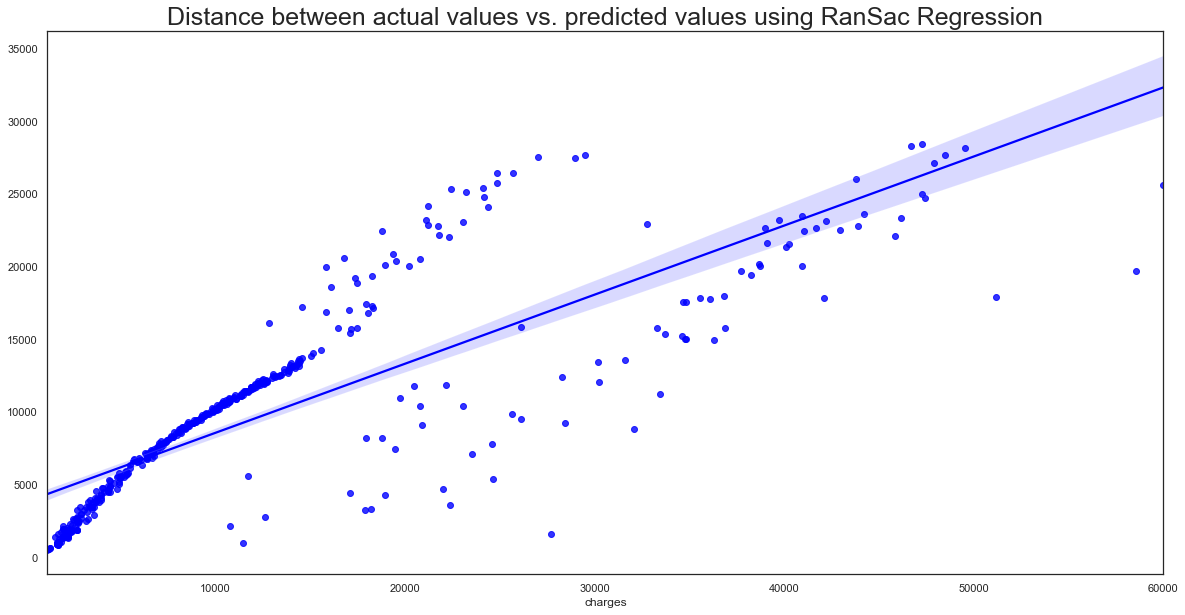

In [442]:
plt.rcParams["figure.figsize"] = (20,10)
sns.regplot(y_val, prediction_ransocregressor, color='Blue')
plt.title('Distance between actual values vs. predicted values using RanSac Regression', fontsize = 25)


In [443]:
#Model MSE with RansacRegressor model 

MSE = mean_squared_error(y_val, prediction_ransocregressor)
MSE

61469070.7415588

In [444]:
#Model RMSE with RansacRegressor model 

RMSE= np.sqrt(MSE)
RMSE

7840.221345189101

In [445]:
#Model MAE with RansacRegressor model 

mae = mean_absolute_error(y_val, prediction_ransocregressor)
mae

3598.426818219772

In [446]:
#Decision Tree Regressor Model

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)
model.score(X_train, y_train)

1.0

In [252]:
model.score(X_val, y_val)

0.6961239741123898

In [253]:
prediction_decisiontreeregressor = model.predict(X_val)
prediction_decisiontreeregressor

array([ 1263.249   , 11842.62375 ,  8782.469   ,  8978.1851  ,
        1711.0268  , 39983.42595 ,  8978.1851  , 11658.37915 ,
        4435.0942  , 21082.16    , 12523.6048  , 12105.32    ,
        6356.2707  ,  7443.64305 ,  1137.011   ,  8978.1851  ,
        4766.022   ,  5926.846   , 11363.2832  , 13470.86    ,
       10797.3362  , 40419.0191  ,  7421.19455 ,  8442.667   ,
       21344.8467  ,  6393.60345 ,  9500.57305 ,  8280.6227  ,
        5836.5204  ,  3857.75925 , 10085.846   ,  5257.50795 ,
       35069.37452 , 34254.05335 , 21978.6769  , 10422.91665 ,
       36950.2567  , 14711.7438  , 24227.33724 , 39556.4945  ,
        4058.1161  , 11944.59435 , 11085.5868  , 20630.28351 ,
        4934.705   , 13217.0945  ,  1725.5523  , 34166.273   ,
        9866.30485 , 11244.3769  , 13555.0049  , 12105.32    ,
        2395.17155 ,  8515.7587  , 18223.4512  , 11326.71487 ,
       40974.1649  , 12638.195   , 23241.47453 ,  1146.7966  ,
        3471.4096  , 13143.86485 , 35147.52848 ,  2850.

C:\Users\Nathaniel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distance between actual values vs. predicted values using DecisionTree Regressor')

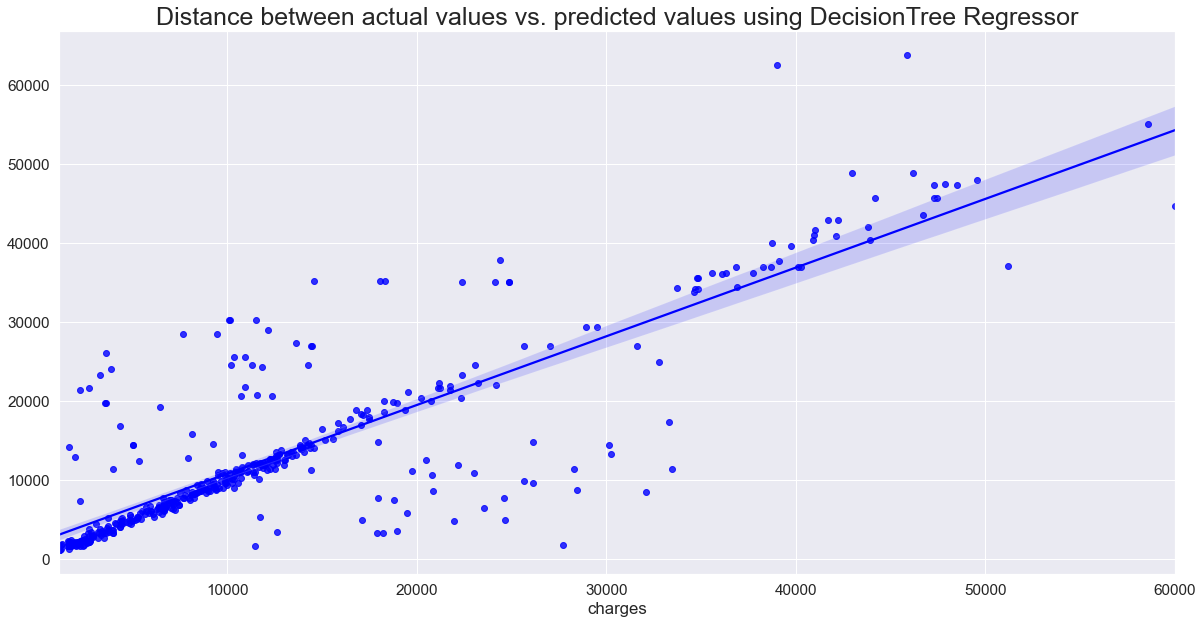

In [254]:
plt.rcParams["figure.figsize"] = (20,10)
sns.regplot(y_val, prediction_decisiontreeregressor, color='Blue')
plt.title('Distance between actual values vs. predicted values using DecisionTree Regressor', fontsize = 25)

In [255]:
#Model MSE with DecisionTreeRegressor model 

MSE = mean_squared_error(y_val, prediction_decisiontreeregressor)
MSE

41495257.772164054

In [256]:
#Model RMSE with DecisionTreeRegressor model 

RMSE= np.sqrt(MSE)
RMSE


6441.681284584332

In [257]:
#Model MAE with DecisionTreeRegressor model 

mae = mean_absolute_error(y_val, prediction_decisiontreeregressor)
mae

3061.8842135950226

In [ ]:
#Out of all the 6 models i implemented. Random Forest REgression is the best model that predicts accurately 
#Gradient Boosting Regressor
#Ridge Regression
#Random Forest Regression
#Ransac Regression
#Decision Tree Regressor

In [260]:
#Try enhancing the models by removing the outliers from charges & bmi
#Check the dimension of the table
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (1338, 7)


In [261]:
#Remove all the outliers that were found previously to see if it makes a difference

In [262]:
data = data.drop([34])
data = data.drop([543])
data = data.drop([577])
data = data.drop([819])
data = data.drop([1146])
data = data.drop([1230])
data = data.drop([1300])
data = data.drop([116])
data = data.drop([847])
data = data.drop([1047])
data = data.drop([1317])

In [263]:
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (1327, 7)


In [264]:
y = data.iloc[:, [6]]
x = data.iloc[:, [0,1,2,3,4,5]]

In [265]:
# split the data using 70:30 ratio
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size =0.33, random_state=1)

In [266]:
# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

No. of samples in training set:  889
No. of samples in validation set: 438


In [269]:
#RandomForestRegressor Model
#fit the training model on RandomForest

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0).fit(X_train, y_train)
model.score(X_train, y_train)

<ipython-input-269-63aa75b538d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor(random_state=0).fit(X_train, y_train)


0.9745180231181326

In [270]:
model.score(X_val, y_val)

0.8644641561962164

In [ ]:
#No real difference in model results by removing the outliers

In [276]:
# split the data using 70:30 ratio
X_train, X_val, y_train, y_val = train_test_split(x1, y1, test_size =0.33, random_state=1)

In [277]:
#try removing region, children,sex 
y1 = data.iloc[:, [6]]
x1 = data.iloc[:, [0,2,4]]

In [278]:
model = RandomForestRegressor(random_state=0).fit(X_train, y_train)
model.score(X_train, y_train)

<ipython-input-278-a2310fd7b99d>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor(random_state=0).fit(X_train, y_train)


0.9681977761575429

In [279]:
model.score(X_val, y_val)

0.8275066672375512

In [338]:
#Removing columns such as region, sex and children did not improve the accurace results, in fact it dropped a little

In [367]:
#try removing region, 
y1 = data.iloc[:, [6]]
x1 = data.iloc[:, [0,1,2,3,4]]

In [368]:
model = RandomForestRegressor(random_state=0).fit(X_train, y_train)
model.score(X_train, y_train)

<ipython-input-368-a2310fd7b99d>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor(random_state=0).fit(X_train, y_train)


0.9773019251729405